In [1]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
os.chdir('..')
os.getcwd()

'/Volumes/Rohith/College/SpatioTemporalKoopman'

# Data Processing

In [3]:
pathData = os.path.join(os.getcwd(), 'data', 'BTC-USD.csv')

In [4]:
data = pd.read_csv(pathData)

In [5]:
data.drop(columns=['Adj Close', 'High', 'Low', 'Open'], inplace=True)

In [6]:
scaler = MinMaxScaler()
volD = data['Volume'].values.reshape(-1,1)
aa = scaler.fit_transform(volD)
data['Vol'] = pd.DataFrame(aa)

In [7]:
data.tail()

,Date,Close,Volume,Vol
2106,2021-05-13,49716.191406,9.672115e+10,0.275558
2107,2021-05-14,49880.535156,5.573750e+10,0.158780
2108,2021-05-15,46760.187500,5.916105e+10,0.168535
2109,2021-05-16,46456.058594,6.404787e+10,0.182460
2110,2021-05-17,45367.214844,8.320761e+10,0.237053


In [8]:
data['Date'][0]

'2015-08-07'

In [9]:
daa = data['Date'].values
mon = []
dat = []
for i in daa:
    mon.append(i[5:7])
    dat.append(i[8:])
data['Month'] = pd.DataFrame(mon)
data['Day'] = pd.DataFrame(dat)

In [10]:
D = data.head(100)

In [139]:
data.fillna(-1,inplace=True)

In [115]:
vol = data['Vol'].values

In [116]:
max(vol)

0.9999999999999999

In [146]:
max(data["Close"].tolist())

63503.45703099999

# Tensor Creation

In [140]:
def sna(dat):
    mon = dat['Month'].values
    dayy = dat['Day'].values
    vol = dat['Vol'].values
    close = dat['Close'].values
    snps = []
    ctr = np.zeros(shape=(10**4,31))
    for i in range(len(mon)-1):
        if(i != len(mon)):
            if(mon[i] != mon[i+1]):
                snps.append(ctr)
                ctr = np.zeros(shape=(10**4,31))
            ctr[int(vol[i]*10**4)][int(dayy[i])-1] = close[i]
    return snps

In [141]:
a = sna(data)

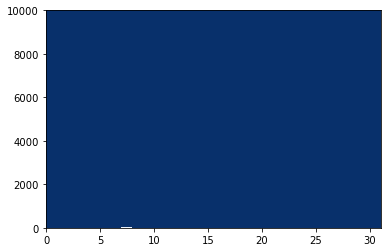

In [153]:
plt.pcolor(a[22],cmap=cm.Blues_r)